# Problem 9 - Scrabble Word Length Bias
----
In a previous assignment you created a Scrabble word generator that takes a rack of letters and shows all the possible words that can be created. What is the efficiency, in big-O notation, of your solution?


my solution had a O(N!) big-O efficiency, because though it only had one while loop, the permutations (N!) increases in a factorial manner as the number of letters increase

Write a program that randomly selects 7 letters and computes the time it takes to compute all the valid words for each possible word length. Run your program 10 times and plot out the results for each random set of letters.

The plots should look similar to the following:

![](images/plot_9.png)

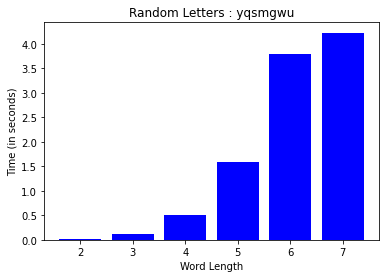

In [23]:
import matplotlib.pyplot as plt
import random
import string
import time
import itertools

class Word:
    def __init__(self, word):
        self.word = word
        self.length = len(word)

class ScrabbleWordValidator:
    def __init__(self):
        scrabble_file=open("scrabble_list.txt",'r')
        scrabble_content=scrabble_file.read()
        scrabble_neutral=scrabble_content.lower()
        scrabble_list=scrabble_neutral.split()
        i=0
        scrabble_tuples=[]
        while i < 53901:
            splitted=tuple(list(scrabble_list[i]))
            scrabble_tuples.append(splitted)
            i+=1
        self.word_list=[]
        for t in scrabble_tuples:
            self.word_list.append("".join(t))

    
    def is_scrabble(self, word):
        if word in self.word_list:
            return True
        else:
            return False

scrabble_list = ScrabbleWordValidator()

random_letters=''.join(random.choices(string.ascii_lowercase, k=7))

x1=[]
y1=[]
word_objects = []
x=2
while x <=7:
    x1.append(x)
    start=time.time()
    word_tuples= list(itertools.permutations(list(random_letters),x))
    for t in word_tuples:
        word="".join(t)
        if scrabble_list.is_scrabble(word):
            word_objects.append(word)
    end=time.time()
    y1.append(end-start)
    x+=1

plt.bar(x1, y1, color='b')
plt.plot()

plt.xlabel("Word Length")
plt.ylabel("Time (in seconds)")
plt.title("Random Letters : {}".format(random_letters))
plt.show()


Do the specific letters that are in your rack affect the efficiency of your solution? Do they impact the actual runtime? How can can you design an experiment to verify this? Run your experiment and provide evidence to support your claim.

I initially thought that letters that were appeared more frequently in the valid scrabble list would incur more runtime. However, after I did my experiment below with a similar type of operation as my program above, it does not seem like the letter affects the program runtime by that much.

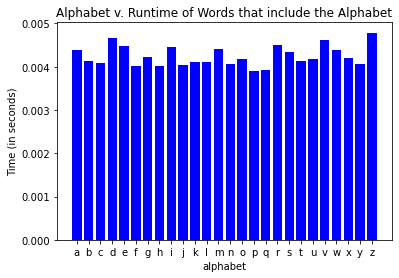

In [26]:
import string

scrabble_file=open("scrabble_list.txt",'r')
scrabble_content=scrabble_file.read()
scrabble_neutral=scrabble_content.lower()
scrabble_list=scrabble_neutral.split()
i=0
scrabble_tuples=[]
while i < 53901:
    splitted=tuple(list(scrabble_list[i]))
    scrabble_tuples.append(splitted)
    i+=1
word_list=[]
for t in scrabble_tuples:
    word_list.append("".join(t))

x2=[]
y2=[]

word_storer=[]
o=0
while o<27:
    for alpha in string.ascii_lowercase:
        x2.append(alpha)
        start=time.time()
        for word in word_list:
            word_storer.append(word)
        end=time.time()
        y2.append(end-start)
        o+=1

plt.bar(x2, y2, color='b')
plt.plot()

plt.xlabel("alphabet")
plt.ylabel("Time (in seconds)")
plt.title("Alphabet v. Runtime of Words that include the Alphabet")
plt.show()
